In [27]:
import shapely
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
spe = ['loblolly pine','sweetgum','red maple','slash pine','yellow-poplar',
      'balsam fir','sugar maple','quaking aspen','northern white-cedar','paper birch']

trees = pd.read_csv('county_tree_temp_dwp_prcp_KT_NS10.csv')
trees = trees.sort_values(['state_code','county_code','species','year'])
trees = trees.reset_index(drop = True)

#clean data
trees = trees.drop(trees.loc[(trees.volume == 0) | (trees.height == 0)].index)
trees = trees.loc[trees.species.isin(spe)]

In [31]:
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

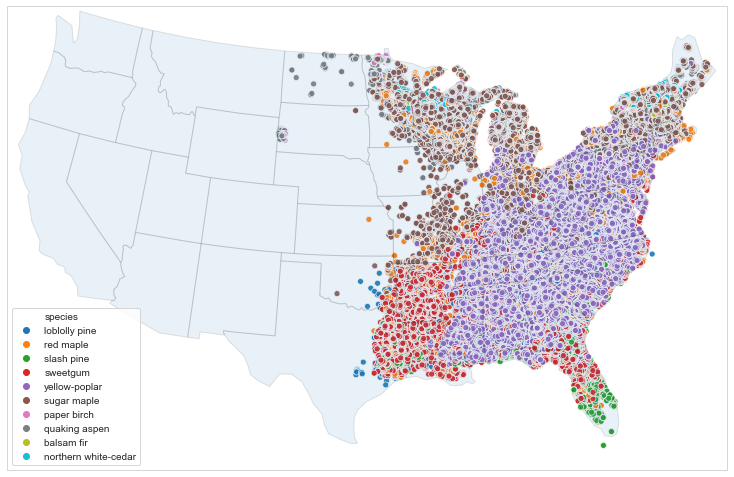

In [63]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-119, -74, 22, 50], ccrs.Geodetic())
ax.add_geometries(shpreader.Reader(states_shp).geometries(), ccrs.PlateCarree(),alpha = 0.1, edgecolor='k')

xf = 'longitude'
yf = 'latitude'
sns.scatterplot(data=trees,x=xf,y=yf,hue="species", alpha=0.9,ax = ax,transform=ccrs.PlateCarree())
plt.legend(loc = 3)
plt.show()

In [43]:
trees

,year,state_code,county_code,species,latitude,longitude,volume,Biomass,height,diameter,number_trees,mean_temp,mean_dwp,mean_prcp
20,2001,1,1,loblolly pine,32.578953,-86.593001,254.208304,5270.671429,2172.0,349.500000,50,67.470830,54.867025,0.153781
21,2002,1,1,loblolly pine,32.562518,-86.581838,866.406357,17082.823611,3131.0,573.799996,62,68.069951,56.273165,0.157042
22,2003,1,1,loblolly pine,32.535969,-86.734196,247.211446,5014.143237,1905.0,348.899998,47,64.080156,55.591629,0.158144
23,2004,1,1,loblolly pine,32.578173,-86.627483,206.510939,4220.421067,1786.0,308.200000,48,67.785707,55.894512,0.179133
24,2005,1,1,loblolly pine,32.551779,-86.647174,608.371252,12257.789499,3163.0,597.999998,65,66.449850,54.171372,0.163352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172281,2012,55,141,sugar maple,44.481678,-89.746765,63.538165,1754.040654,485.0,69.400000,9,48.914208,37.000000,0.076038
172282,2014,55,141,sugar maple,44.505487,-90.105137,37.169368,1069.052807,283.0,42.600000,6,41.191507,32.571507,0.068082
172283,2016,55,141,sugar maple,44.565235,-90.139175,238.652117,6120.423981,599.0,108.400001,8,47.232692,37.228022,0.082692
172284,2017,55,141,sugar maple,44.415565,-89.801750,58.721761,1529.751839,234.0,32.100000,3,46.366301,37.046301,0.087890
